# Python pour les scientifiques
**Marc BUFFAT, Université Lyon 1**

In [5]:
%matplotlib inline
# option de mise en page
from IPython.core.display import HTML,display
# bibliotheques de base
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

## Questions préliminaires
- plateforme **jupyter-exam**, 
    - cours **MGC2367M** (alternant) ou **MGC2367MG2** (groupe 2)
    
    - [https://jupyter-exam.mecanique.univ-lyon1.fr](https://jupyter-exam.mecanique.univ-lyon1.fr)

    - [questions sur Python](https://jupyter-exam.mecanique.univ-lyon1.fr/services/MGC2367M/notebooks/source/Introduction/Introduction.ipynb)

## Variables

In [6]:
# variable entiere, reel, chaine
N=9
print(N,type(N))
X=9.0
print(X,type(X))
S="chaine"
print(S,type(S))

9 <class 'int'>
9.0 <class 'float'>
chaine <class 'str'>


### fonction mathématique = bibliotheque numpy renome np
     np.cos, np.sin, np.tan ..
     np.log, np.exp, ..
     np.asin, np.acos ..
     ...
  
  **aide**
  
    np.log?

### manipulation de chaine de caractères

    découpage d'une chaine en mots
    concaténation de chaine
    opérations de recherche et substitution (voir doc)

In [7]:
S="ceci est une chaine"
print("chaine 1:",S)
mots=S.split()
print("mots=",mots)
print("2nd mot=",mots[1])
S2=" pour la suite"
print("chaine 2:",S2)
print("concatenation:",S+S2)

chaine 1: ceci est une chaine
mots= ['ceci', 'est', 'une', 'chaine']
2nd mot= est
chaine 2:  pour la suite
concatenation: ceci est une chaine pour la suite


In [8]:
# implementation

## structure de contrôle

### Comparaison
     > , >= , < , <= 
     ==  égalité
     !=  different
     True False
     and or

In [9]:
print(5 < 4)
print((5 < 4 ) or (3 > 2))

False
True




### Test logique if

example: test si un nombre aléatoire entre -100 et 100 est positif ou negatif

In [10]:
import random

n = random.randint(-100,100)
print("pour n=",n)
if n>0:
    print("n positif")
elif n<0:
    print("n negatif")
else:
    print("n null")


pour n= -23
n negatif


In [11]:
# implementation
import random

### Boucle for de 0 a N (exclus)

    for i in rang(N):
       exp1
       exp2
       ....
#### noter l'utilisation de : et l'indentation dans la boucle 

In [12]:
N=3
print("boucle de 0 a N-1")
for i in range(N):
    print(i)
# ou de 1 a N
print("boucle de 1 a N")
for i in range(1,N+1):
    print(i)

boucle de 0 a N-1
0
1
2
boucle de 1 a N
1
2
3


In [13]:
# exemple calcul de la somme des N premiers entiers positifs
N=100
S=0
for i in range(1,N+1):
    S=S+i
print(S)

5050


In [14]:
# exemple calcul de la somme des N premiers entiers positifs

### Exemple : calculer les N=100 premiers termes de la serie S 


$ S_n = x - x^2/2 + x^3/3 + ..   $  soit  
$$ S_n =  - \sum_{i=1}^{N} \frac{(-x)^{i}}{i} $$

DL de $log(1+x)$: 
$$ \lim_{n\rightarrow\infty} S_n = log(1+x) $$

et tester la convergence (i.e. l'erreur)

In [15]:
# solution
N=100
x=1.0
S=0.0
for i in range(1,N+1):
    S = S - (-x)**i/i
print("S100=",S," err=",np.log(1+x)-S)

S100= 0.688172179310195  err= 0.004975001249750255


In [16]:
# implementation

### solution optimisee

In [17]:
# solution optimisee
S=0.0
term=x
for i in range(1,N+1):
    S = S + term/i
    term = -term*x
print("S100=",S," err=",np.log(1+x)-S)

S100= 0.688172179310195  err= 0.004975001249750255


In [18]:
# implementation

### Boucle tant que (while)

    while (condition) :
        exp1
        exp2
        ...
     

### Exemple: racine de $\cos x^2 $ par dichotomie 
 
 **algorithme**
  
    r = (a+b)/2 
    tant que abs(cos r^2) >  eps        
       si cos r^2 * cos a^2 > 0 alors        
          a = r        
       sinon    
          b = r
       r = (a+b)/2  
    fin tant que
  
  

In [19]:
# solution
def dichotomie(a,b):
    r = (a+b)/2.
    while np.abs(np.cos(r**2)) > 1.e-1 :
        if np.cos(r**2)*np.cos(a**2) > 0:
            a = r
        else:
            b = r
        r = (a+b)/2.
        print(a,b,r)
    #
    return r

In [20]:
# implementation sous forme de fonction: dichotomie(a,b)


## validation 
calcul des racines de 
$$ cos(x^2) = 0 $$

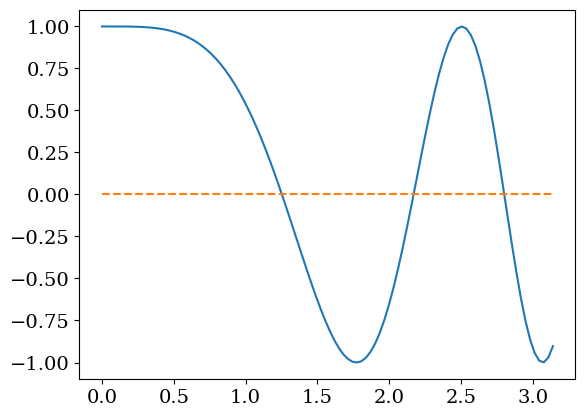

In [21]:

X=np.linspace(0,np.pi,100)
Y=np.cos(X**2)
plt.plot(X,Y)
plt.plot(X,np.zeros(X.size),'--')

In [22]:
x = dichotomie(0.,1.5)
print(x,np.cos(x**2))

0.75 1.5 1.125
1.125 1.5 1.3125
1.125 1.3125 1.21875
1.21875 0.08534083294179849


##  Manipulation de liste
la liste est un ensemble ordonné de valeurs (eventuelement de type differents)


In [23]:
# liste vide
L=[] 
print(L,type(L),"dim=",len(L))

[] <class 'list'> dim= 0


In [24]:
L=[1,'un',2,'deux']
print(L,type(L)," dim=",len(L))

[1, 'un', 2, 'deux'] <class 'list'>  dim= 4


In [25]:
# 1er (indice 0) et dernier element (indice -1)
print(L[0],L[1],L[-1])
# extraction d'un sous liste avec un pas de 2
print("sous liste :",L[0:-1:2])

1 un deux
sous liste : [1, 2]


In [26]:
# on peut ajouter (a la fin) ou enlever des elements d'un liste
L.append('quatre')
print(L)
L.remove('quatre')
print(L)

[1, 'un', 2, 'deux', 'quatre']
[1, 'un', 2, 'deux']


### Exemple: calcul des nombres premiers inférieurs à N
**algorithme**: 

    boucle sur p de 2 a N 
      test si p est divisible par un nombre premier précédent
      si oui ajouter p a la liste des nombres premiers

on mettra les nombres premiers trouvés dans une liste P

In [27]:
# solution
N=100
P=[2]
for i in range(3,N+1):
    premier=True
    for p in P:
        if i%p == 0 :
            premier = False
            #print i," n'est pas premier"
            break;
    if premier: 
        P.append(i)
        #print i, " est premier"
print("liste des nbres premiers <",N,"=",P)       

liste des nbres premiers < 100 = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [28]:
# implementation


### Dictionnaire

ensemble avec une clé : valeur

    dict = { cle: val, ;.}

In [29]:
dict_anglais={'I':'je','a':'un','am':'suis','lonesome':'solitaire'}
dict_anglais['cow-boy']='vacher'
print("dictionaire")
for key,val in dict_anglais.items() :
    print(key,'=',val)

phrase='I am a lonesome cow-boy'
print("phrase     : ",phrase)
trad=''
for word in phrase.split():
    trad=trad+' '+dict_anglais[word]
print("traduction :", trad)

dictionaire
I = je
a = un
am = suis
lonesome = solitaire
cow-boy = vacher
phrase     :  I am a lonesome cow-boy
traduction :  je suis un solitaire vacher


### Attention a la copie de structure

In [30]:
# copie de scalaires
x=1
a=x
a=2
print(a,x)

2 1


In [31]:
# copie de listes
list1 = [[1],[2]]
print("list1=",list1)
list2=list1
list2[0][0]=0
print("list2=",list2)
print("list1=",list1)

list1= [[1], [2]]
list2= [[0], [2]]
list1= [[0], [2]]


### Adresse d'une variable et d'une structure

In [32]:
print("@list1=",hex(id(list1)))
print("@list2=",hex(id(list2)))
print("@list1[0]=",hex(id(list1[0])))
print("@list1[1]=",hex(id(list1[1])))

@list1= 0x7f2e6aec3f80
@list2= 0x7f2e6aec3f80
@list1[0]= 0x7f2e6aec1900
@list1[1]= 0x7f2e6aec2d80


### Copie versus aliasing

In [33]:
from copy import deepcopy

list1 = [[1],[2]]
list2 = list1 
list3 = deepcopy(list1)

print('@IDs:\nlist1: {}\nlist2: {}\nlist3: {}\n'
    .format(hex(id(list1)), hex(id(list2)), hex(id(list3))))
print('list1:', list1)

list2[0][0] = 3
print('list123:', list1,list2,list3)

list3[0][0] = 5
print('list123:', list1,list2,list3)

@IDs:
list1: 0x7f2e6aec1d80
list2: 0x7f2e6aec1d80
list3: 0x7f2e6aec2d00

list1: [[1], [2]]
list123: [[3], [2]] [[3], [2]] [[1], [2]]
list123: [[3], [2]] [[3], [2]] [[5], [2]]


## Tableaux numériques numpy
structure de données optimisée pour manipuler des vecteurs , des matrices ou des n-matrices

création de tableau en spécifiant les dimensions et le type (reel par defaut)

In [34]:
# vecteurs
dim=4
X=np.zeros(dim)
Y=np.ones(dim,dtype=int)
Z=np.random.rand(dim)
print(X)
print(Y)
print(Z)
print("X=",type(X),len(X),X.shape,X.ndim,X.size)
print("Y=",type(Y),len(Y),Y.shape[0])
W=np.linspace(0.,1.,5)
print("W=",W)

[0. 0. 0. 0.]
[1 1 1 1]
[0.68581715 0.58730415 0.60041217 0.32158345]
X= <class 'numpy.ndarray'> 4 (4,) 1 4
Y= <class 'numpy.ndarray'> 4 4
W= [0.   0.25 0.5  0.75 1.  ]


In [35]:
# matrices
dim=4
A=np.ones((dim,2*dim))
print(A)
print("A=",type(A),len(A),A.shape,A.ndim,A.size)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
A= <class 'numpy.ndarray'> 4 (4, 8) 2 32


### accès aux elements avec un indice commencant à 0

     X[0]   1er element
     X[1]   2nd
     ..
     X[-1]   dernier
matrice stockage par colonne

     A[0,0]  1er element
     

### Exemple: calcul du produit matrice vecteur Y=A.X

$$Y_i = \sum_{j=1}^M A_{ij} X_j \;\; \forall i=1,N$$

In [36]:
N=3; M=2;
A=np.random.rand(N,M)
print("A=",A)
X=np.ones(M)
print("X=",X)
Y=np.zeros(N)
for i in range(N):
    for j in range(M):
        Y[i] = Y[i] + A[i,j]*X[j]
print("Y=",Y)

A= [[0.69696765 0.79305074]
 [0.84783771 0.58651811]
 [0.34565138 0.73515587]]
X= [1. 1.]
Y= [1.49001839 1.43435582 1.08080724]


In [37]:
# implementation


### Exemple: calcul de la matrice de Vandermonde V (N,M)

Soit un vecteur $X$ de dimension $N$:

$$ V_{ij} = x_i ^{j-1} \;\; \forall i=1,N \;\; \forall j=1,M$$
- écrire un algorithme avec des boucles


In [38]:
# implemtation simple
N=5; M=N
X = np.arange(N)
V=np.zeros((N,M))
for i in range(N):
    for j in range(M) :
        V[i,j] = X[i]**j
print("V=",V)

V= [[  1.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]]


In [39]:
#implentation simple


In [40]:
# test efficacite
N=200; M=N;
X=np.random.rand(N)

In [41]:
%%timeit -n 4
# version avec des boucles
V=np.zeros((N,M))
for i in range(N):
    for j in range(M) :
        V[i,j] = X[i]**j

19.1 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 4 loops each)


In [42]:
%%timeit -n 4
# version optimisee
V1=np.ones((N,M))
for j in range(1,M):
    V1[:,j]=V1[:,j-1]*X[:]

1.35 ms ± 352 µs per loop (mean ± std. dev. of 7 runs, 4 loops each)


#### extraction de sous vecteur ou de sous matrice

    range    
       [fin] 
       [deb:fin]
       [deb:fin:pas]
       [::] equivalent [0:-1:1] 

### Notation matriciel: 
opérations terme à terme sur les vecteurs et matrices

       + - * /  opération terme à terme

In [43]:
N=4
X = np.arange(N)
Y = np.ones(N)
Z = X + Y
print(Z)
Z = X * Y
print(Z)
Z = X / Y
print(Z)

[1. 2. 3. 4.]
[0. 1. 2. 3.]
[0. 1. 2. 3.]


In [44]:
A = np.ones((N,N))
B = A + A
C = B * B
print("A=",A,"\nA+A=",B,"\nB*B=",C)

A= [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 
A+A= [[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]] 
B*B= [[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]


### produit scalaire, matriciel et tensoriel : fonction numpy dot


In [45]:
print("X  =",X)
print("X*X=",X*X)
print("X.X=",np.dot(X,X))
print("A  =",A)
print("A*X=",A*X)
print("A.X=",np.dot(A,X))

X  = [0 1 2 3]
X*X= [0 1 4 9]
X.X= 14
A  = [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
A*X= [[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]
A.X= [6. 6. 6. 6.]


### resolution systeme lineaire
bibliotheque linalg de numpy

In [46]:
from numpy.linalg import solve,norm
N=3
A=np.random.rand(N,N)
B=np.ones(N)
X=solve(A,B)
print(X)
err = norm(B-np.dot(A,X))
print("erreur = ",err)

[-0.46681082  1.30702929  0.51520558]
erreur =  2.482534153247273e-16


### Exemple: polynôme d'interpolation
Soient N points de mesure $xk,yk$ calculer les N coefficiants $a_i$ du polynôme d'interpolation $p(x)$ de degré $N-1$ passant par ces $N$ points.

$$ p(x)=\sum_{i=0}^{N−1} a_i x^i \mbox{ avec } p(x_k)=y_k$$


On notera que les $a_i$ sont solution du système linéaire:
$$ \sum_{j=0}^{N-1} a_j x_i^j = y_i $$

A.N:  $N=5$ sur $[0,\pi/2]$ pour $cos(x)$  

In [47]:
N=5
X=np.linspace(0,np.pi/2,N)
Y=np.cos(X)
M=np.ones((N,N))
for j in range(1,N):
    M[:,j]=M[:,j-1]*X
A=solve(M,Y)
P=str(A[0])
for j in range(1,N):
    P += " + {} x^{}".format(A[j],j)
print("Polynome: ",P)

Polynome:  1.0 + 0.002824120785207486 x^1 + -0.5143253869134662 x^2 + 0.023168662712955968 x^3 + 0.028714225230189197 x^4


In [48]:
# implementation

##  Bibliothèques scientifiques Python

### liste des sous-bibliothèques numpy

    random (numpy.random)
    algebre lineaire (numpy.linalg)
    transforee de Fourier (numpy.fft
    matrices (numpy.matlib)


### liste des sous-bibliotheques scipy

    Special functions (scipy.special)
    Integration (scipy.integrate)
    Optimization (scipy.optimize)
    Interpolation (scipy.interpolate)
    Fourier Transforms (scipy.fftpack)
    Signal Processing (scipy.signal)
    Linear Algebra (scipy.linalg)
    .....


## Fonctions

**fonction** implémentation d'un algorithme avec des données (arguments) et un résultat qui est la valeur retournée par la fonction

     def nom(arguments) :
         """ commentaire """
         instruction 1
         instruction 2
         ...
         return val

### exemple 
écrire une fonction $f(x)$ calculant $\frac{\sin{x}}{x}$

In [49]:
def f(x):
    """calcul de sin(x)/x"""
    if abs(x) < 1.e-10:
        return 1.
    else :
        return np.sin(x)/x

print("f(1)=",f(1))
print("f(0)=",f(0))

f(1)= 0.8414709848078965
f(0)= 1.0


In [50]:
# implementation

### Exemple: PGCD
écrire une fonction pgcd qui calcule le PGCD de 2 nombres entiers a et b

**algorithme**

      pgcd(a,b)=pgcd(a,b-a) si a<b
      pgcd(a,b)=pgcd(b,a-b) si a>b
      pgcd(a,b)=a           si a=b

In [51]:
# solution
def PGCD(a,b):
    """ calcul PGCD de a et b"""
    while a != b :
        if a > b :
            a = a - b
        else:
            b = b - a
    return a
print("PGCD(9,21)=",PGCD(9,21))
print("PGCD(10,25)=",PGCD(10,25))

PGCD(9,21)= 3
PGCD(10,25)= 5


In [52]:
# implementation

### Exemple:
calculer la valeur en x d'un polynome p(x) donné par ces coefficiants $a_i$

$$ p(x) = \sum_i a_i x^i $$

In [53]:
def polynome(x,A):
    """calcul de la valeur en x du polynome sum(a_i*x^i)"""
    p=0.0
    xi=1
    for i in range(A.size):
        p  += A[i]*xi
        xi *= x
    return p
P = np.array([0.,0.,1.])
print("Polynome P:",P)
print("P(0)=",polynome(0.,P))
print("P(1)=",polynome(1.,P))
print("P(2)=",polynome(2.,P))

Polynome P: [0. 0. 1.]
P(0)= 0.0
P(1)= 1.0
P(2)= 4.0


In [54]:
# implementation

## Formatage des écritures

possibilité de formatter les sorties en spécifiant un format (identique a printf en C)
avec des champs % (%d entier, %g reels , %s chaine, ..) et des caractères spéciaux (/n suate de ligne, /t tabulation,..)

     print "format"%(val1,val2,..)

In [55]:
X=1.0; n=10; S="chaine"
print("X=%g\tn=%d\ntext:\t%s"%(X,n,S))

X=1	n=10
text:	chaine


en python 3, on préfere utiliser la fonction format et {}

In [56]:
print("X={:g}\tn={}\ntext:\t{}".format(X,n,S))

X=1	n=10
text:	chaine


### exemple:
Afficher la valeur de 2 vecteurs X,Y en affichant pour chaque ligne l'indice (de 1 a N), X[i] et Y[i] séparés par une ,  (format excel csv) 

In [57]:
N=3
X=np.linspace(0,np.pi,N)
Y=np.cos(X)
print("X=",X,"\nY=",Y)

X= [0.         1.57079633 3.14159265] 
Y= [ 1.000000e+00  6.123234e-17 -1.000000e+00]


In [58]:
# solution (avec formatage)
for i in range(N):
    print("{:2d} , \t{:6.3f} , \t{:6.3f}\n".format(i+1,X[i],Y[i]))

 1 , 	 0.000 , 	 1.000

 2 , 	 1.571 , 	 0.000

 3 , 	 3.142 , 	-1.000



In [59]:
# implementation


##  Lecture/écriture des données sur fichier

**fichier** = stockage des données sur disque (ou clé USB)

**accès** avec un nom de fichier et un répertoire (endroit ou est stocké le fichier: peu dépendre du système d'exploitation)

**exemple** 
la commande ls sous unix (Linux) affiche la liste des fichiers dans le répertoire courant

In [60]:
%%bash
ls -al donnees*

-rw-rw-r-- 1 buffat buffat 175 juin   9 17:56 donnees.csv
-rw-rw-r-- 1 buffat buffat 505 juin   9 17:56 donnees.dat
-rw-rw-r-- 1 buffat buffat  44 juin   9 17:56 donnees.txt


### Manipulation d'un fichier

    1/ ouverture du fichier en spécifiant son nom et le type d'accés (lecture/ecriture)
       on récupére une variable F permettant ensuite de manipuler le fichier
    2/ pour écrire (write) dans le fichier on formatte les données par ligne
    3/ pour lire dans le fichier on lit les données par ligne (readline)
    4/ à la fin on foerme le fichier (close)

In [61]:
X=1.0; Y=np.cos(X);
F=open("donnees.txt","w")
print(F)
F.write("# Ceci est un exemple de donnees\n")
F.write("%g %g\n"%(X,Y))
F.close()

<_io.TextIOWrapper name='donnees.txt' mode='w' encoding='UTF-8'>


In [62]:
%%bash
cat donnees.txt

# Ceci est un exemple de donnees
1 0.540302


In [63]:
F=open("donnees.txt",'r')
L=F.readline()
print("1ere ligne: ",L)
L=F.readline()
print("2nd  ligne: ",L)
F.close()

1ere ligne:  # Ceci est un exemple de donnees

2nd  ligne:  1 0.540302



### Exemple:
Ecrire dans un fichier au format csv 2 vecteurs X et Y de dimension N

In [64]:
N=10
X=np.linspace(0,np.pi,N)
Y=np.cos(X)

In [65]:
# correction
F=open("donnees.csv",'w')
for i in range(N):
    F.write("%g , %g \n"%(X[i],Y[i]))
F.close()

In [66]:
# implementation

In [67]:
%%bash
cat donnees.csv

0 , 1 
0.349066 , 0.939693 
0.698132 , 0.766044 
1.0472 , 0.5 
1.39626 , 0.173648 
1.74533 , -0.173648 
2.0944 , -0.5 
2.44346 , -0.766044 
2.79253 , -0.939693 
3.14159 , -1 


### Lecture ecriture de tableaux

sous numpy 

    A=loadtxt(nom)  lecture tableau A dans le fichier nom
    savetxt(nom,X,Y,..)

In [68]:
A=np.loadtxt("donnees.csv",delimiter=",")
X=A[:,0]
Y=A[:,1]
print("X=",X,"\nY=",Y)

X= [0.       0.349066 0.698132 1.0472   1.39626  1.74533  2.0944   2.44346
 2.79253  3.14159 ] 
Y= [ 1.        0.939693  0.766044  0.5       0.173648 -0.173648 -0.5
 -0.766044 -0.939693 -1.      ]


In [69]:
np.savetxt("donnees.dat",np.transpose([X,Y]))

### Exemple:
Ecrire dans un fichier la valeur de 3 tableaux de dimension N=4 avec $X=[0,\pi],Y=cos(X), Z=Y^2sin(X)$ avec par ligne X[i] Y[i] Z[i]

In [70]:
#solution
N=4
X=np.linspace(0,np.pi,N)
Y=np.cos(X)
Z=Y**2 * np.sin(X)
np.savetxt("essai.dat",np.transpose([X,Y,Z]))
print("X=",X,"\nY=",Y,"\nZ=",Z)
print("fichier essai.dat")
!cat essai.dat

X= [0.         1.04719755 2.0943951  3.14159265] 
Y= [ 1.   0.5 -0.5 -1. ] 
Z= [0.00000000e+00 2.16506351e-01 2.16506351e-01 1.22464680e-16]
fichier essai.dat
0.000000000000000000e+00 1.000000000000000000e+00 0.000000000000000000e+00
1.047197551196597631e+00 5.000000000000001110e-01 2.165063509461097324e-01
2.094395102393195263e+00 -4.999999999999997780e-01 2.165063509461094826e-01
3.141592653589793116e+00 -1.000000000000000000e+00 1.224646799147353207e-16


In [71]:
# implementation

##  Tracer de courbe

bibliotheque **matplotlib**

     import matplotlib.pyplot as plt
     
visiter le site:

  - [https://matplotlib.org](https://matplotlib.org)

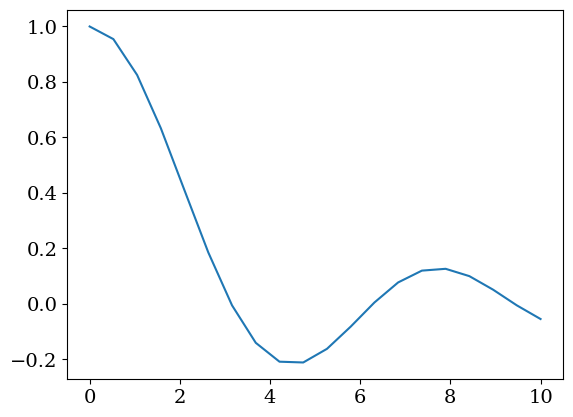

In [74]:
X = np.linspace(1.e-8,10.0,20)
Y = np.sin(X)/X
plt.plot(X,Y)

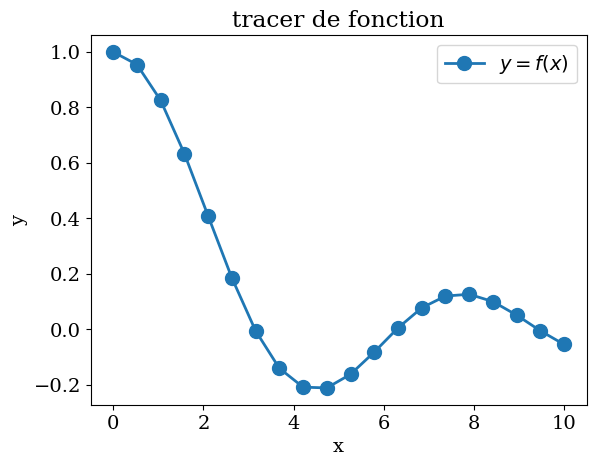

In [75]:
plt.plot(X,Y,'-',lw=2,marker="o",markersize=10,label="$y=f(x)$")
plt.title('tracer de fonction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

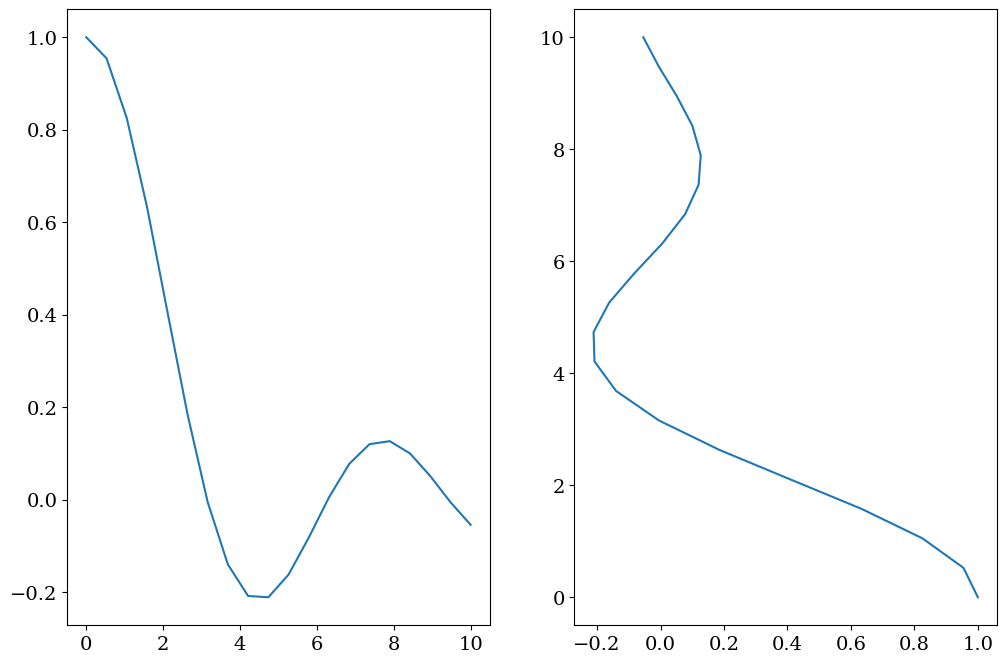

In [76]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(X,Y)
plt.subplot(1,2,2)
plt.plot(Y,X)

### Exemple:
Soit la fonction $f(x)=cos(x)$ sur $[0,\pi]$. Calculer le polynome d'interpolation $p(x)$ de degré N=4 de $f(x)$ en utilisant des points équi-répartis. Tracer les points d'interpolation, le polynôme $p(x)$ et la fonction $f(x)$ sur un meme graphe, et l'erreur d'interpolation $err=|f(x)-p(x)|$ sur un graphe à coté.

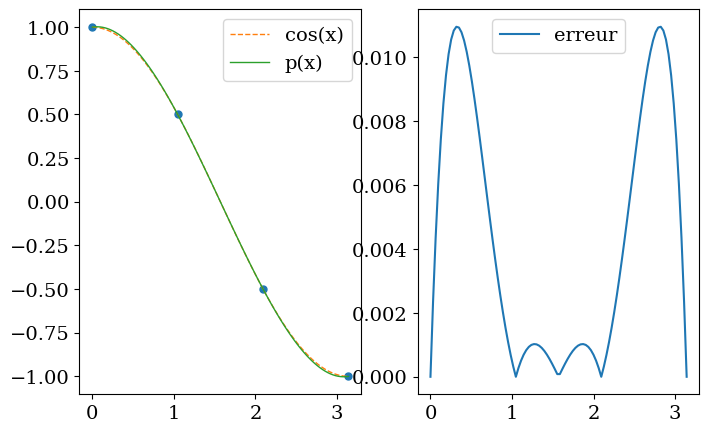

In [77]:
# solution
# calcul interpolation
Ni=4   
Xi=np.linspace(0,np.pi,Ni)
Yi=np.cos(Xi)
M =np.ones((Ni,Ni))
for j in range(1,Ni):
    M[:,j]=M[:,j-1]*Xi
Ai=solve(M,Yi)
# calcul 
X=np.linspace(0,np.pi,100)
Y=np.cos(X)
YY=polynome(X,Ai)
# tracer
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(Xi,Yi,'o',markersize=5)
plt.plot(X,Y,'--',lw=1,label="cos(x)")
plt.plot(X,YY,'-',lw=1,label="p(x)")
plt.legend()
plt.subplot(1,2,2)
plt.plot(X,np.abs(Y-YY),label="erreur")
plt.legend()


In [78]:
# implementation

##  tracer isovaleur 2D

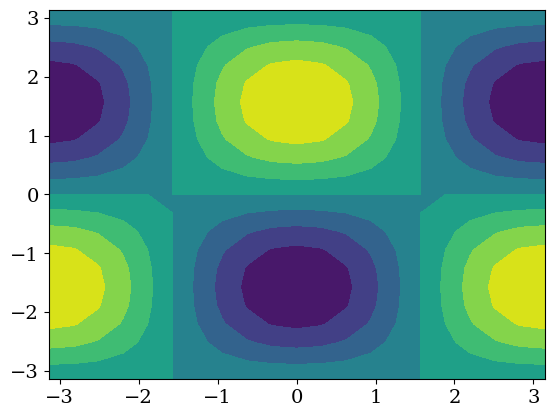

In [79]:
N=21
X=np.linspace(-np.pi,np.pi,N)
Y=np.linspace(-np.pi,np.pi,N)
Z=np.outer(np.sin(X),np.cos(Y))
plt.contourf(X,Y,Z)

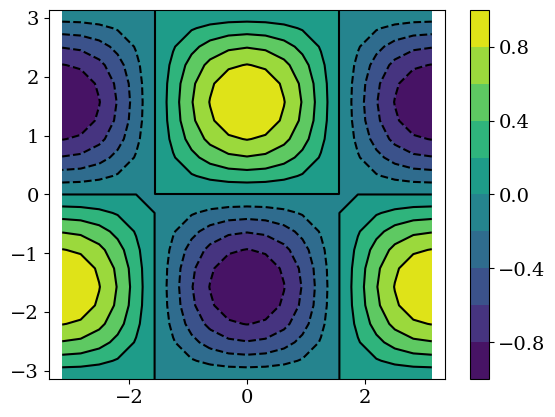

In [80]:
plt.contourf(X,Y,Z,11)
plt.axis('equal')
plt.colorbar()
plt.contour(X,Y,Z,11,colors='k')

### Exemple:
Soit le champ de vitesse correspondant à un tourbillon de Taylor dans $\Omega=[-\pi/2,\pi/2]\times[-\pi/2,\pi/2]$
$$ U = cos(x)*sin(y)  \mbox{ et } V=-sin(x)*cos(y) $$ 

- tracer le champ de vitesse en utilisant la fonction quiver de matplotlib
- tracer la fonction de courant $\psi = cos(x) cos(y) $ vérifiant
$$ \frac{\partial \psi}{\partial y} = U \mbox { et } \frac{\partial \psi}{\partial x} = -V $$

(-1.5707963267948966,
 1.5707963267948966,
 -1.5707963267948966,
 1.5707963267948966)

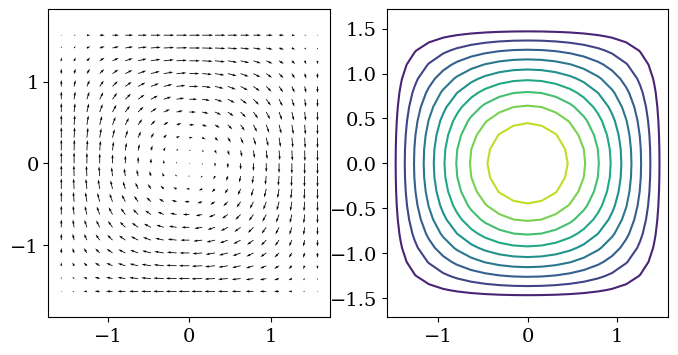

In [81]:
# solution
N=21
X,Y = np.meshgrid(np.linspace(-np.pi/2,np.pi/2,N),np.linspace(-np.pi/2,np.pi/2,N))
U = np.cos(X)*np.sin(Y)
V = -np.sin(X)*np.cos(Y)
Psi = np.cos(X)*np.cos(Y)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.quiver(X,Y,U,V)
plt.axis('equal')
plt.subplot(1,2,2)
plt.contour(X,Y,Psi,11)
plt.axis('equal')

In [82]:
# solution

In [83]:
## 3D plot
from mpl_toolkits.mplot3d import Axes3D

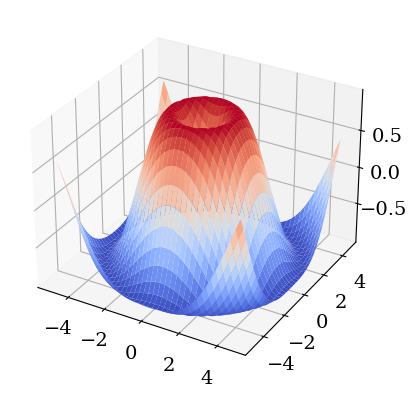

In [85]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0)

## FIN